이것은 [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff) 책의 노트북이다. 가독성을 위해 실행 가능한 코드 블록과 섹션 제목만 포함하고 책의 다른 모든 텍스트 단락, 그림 및 의사 코드는 생략한다.

**무슨 일이 일어나고 있는지 확인하고 싶다면 책과 함께 노트북을 사용하는 것을 권장한다.**

이 노트북은 TensorFlow 2.6 기반이다. (옮긴이: 버전 2.10.0, 애플 실리콘 M1 으로 테스트)

# 7 케라스(Keras)와 작업하기: 심층 분석

## 7.1 다양한 작업 흐름

## 7.2 케라스 모델을 구축하는 다양한 방법

### 7.2.1 순차형 (Sequential) 모델

**`Sequential` 클래스**

In [42]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**순차형 모델을 점진적으로 구축**

In [43]:
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

**처음 구축할 때 모델 호출**

In [44]:
model.build(input_shape=(None, 3))
model.weights # DENSE 1 - shape=(3, 64), DENSE 2 - shape=(64, 10)

[<tf.Variable 'dense_26/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[ 0.01679006,  0.16061118,  0.26701003, -0.2280428 , -0.12471224,
         -0.23237887, -0.17822288,  0.17603251, -0.09629413, -0.13958332,
          0.17197007,  0.23538613,  0.15078032, -0.25730836,  0.07932356,
          0.16397852, -0.00407615,  0.21043682, -0.05930406, -0.2230103 ,
         -0.12524442, -0.03715247, -0.23190947,  0.21561086, -0.00255147,
         -0.19460583,  0.0710004 , -0.01567423,  0.26552176, -0.11137612,
          0.23426294,  0.22319347,  0.16318947, -0.05617675, -0.08478643,
         -0.16660695,  0.088301  , -0.13456589, -0.28302747,  0.23170179,
         -0.12130019,  0.22154635,  0.2500038 , -0.12839462,  0.16036177,
          0.0441528 , -0.11672574,  0.20370513,  0.23142129,  0.16079363,
          0.1879409 , -0.24569215, -0.23669937,  0.10573339,  0.04925492,
          0.15121517,  0.02695763, -0.19555831,  0.15381786,  0.03562963,
         -0.09797272,  0.13451302, -0.0231

**요약 메소드**

In [45]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 64)                256       
                                                                 
 dense_27 (Dense)            (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


**`name` 매개변수로 모델 및 층 이름 부여**

In [46]:
model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="my_last_layer"))
model.build((None, 3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


**모델의 입력 형태 미리 지정**

In [47]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))

In [48]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 64)                256       
                                                                 
 dense_29 (Dense)            (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


### 7.2.2 함수형 (Functional) API

#### 간단한 예제

**두 개의 `Dense` 층을 가진 단순한 모델**

In [50]:
inputs = keras.Input(shape=(3,), name="my_input") # 애상되는 입력은 3-차원 벡터
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [51]:
inputs = keras.Input(shape=(3,), name="my_input")

In [52]:
inputs.shape

TensorShape([None, 3])

In [53]:
inputs.dtype

tf.float32

In [54]:
features = layers.Dense(64, activation="relu")(inputs)

In [55]:
features.shape

TensorShape([None, 64])

In [56]:
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [57]:
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_32 (Dense)            (None, 64)                256       
                                                                 
 dense_33 (Dense)            (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


#### 다중-입력, 다중-출력 모델

**다중-입력, 다중-출력 함수형 모델**

In [58]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4 # 목표

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags]) # 입력 목록을 결합하는 층
features = layers.Dense(64, activation="relu")(features)

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(num_departments, activation="softmax", name="department")(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

In [59]:
model.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title (InputLayer)             [(None, 10000)]      0           []                               
                                                                                                  
 text_body (InputLayer)         [(None, 10000)]      0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 100)]        0           []                               
                                                                                                  
 concatenate_2 (Concatenate)    (None, 20100)        0           ['title[0][0]',                  
                                                                  'text_body[0][0]',       

#### 다중-입력, 다중-출력 모델 훈련

**입력 및 대상 배열 목록을 제공하여 모델 훈련**

In [60]:
import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

In [61]:
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

2022-12-10 19:21:44.162354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


12/40 [========>.....................] - ETA: 0s - loss: 19.1073 - priority_loss: 0.3435 - department_loss: 18.7639 - priority_mean_absolute_error: 0.5100 - department_accuracy: 0.0703  

2022-12-10 19:21:45.094991: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 0s 3ms/step


2022-12-10 19:21:45.683575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [62]:
priority_preds[0], department_preds[0]

(array([1.], dtype=float32),
 array([1.3090253e-09, 1.4793316e-07, 1.4491859e-01, 8.5508138e-01],
       dtype=float32))

**입력 및 대상 배열 사전을 제공하여 모델 훈련**

In [63]:
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

 1/40 [..............................] - ETA: 17s - loss: 22.1726 - priority_loss: 0.3484 - department_loss: 21.8242 - priority_mean_absolute_error: 0.5352 - department_accuracy: 0.0312

2022-12-10 19:21:46.244947: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/40 [=======>......................] - ETA: 0s - loss: 39.5955 - priority_loss: 0.3438 - department_loss: 39.2518 - priority_mean_absolute_error: 0.5102 - department_accuracy: 0.0739   

2022-12-10 19:21:47.340422: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 0s 4ms/step


2022-12-10 19:21:47.894957: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


#### 함수형 API의 강력함: 층 연결에 접근

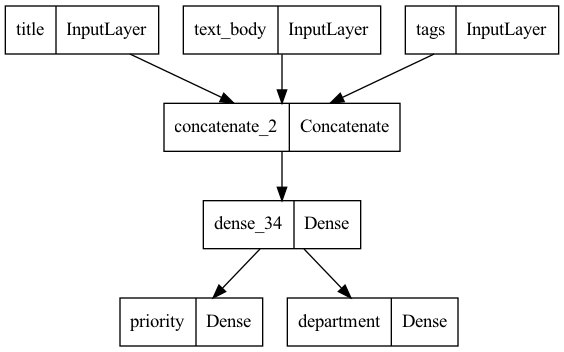

In [64]:
keras.utils.plot_model(model, "ticket_classifier.png")

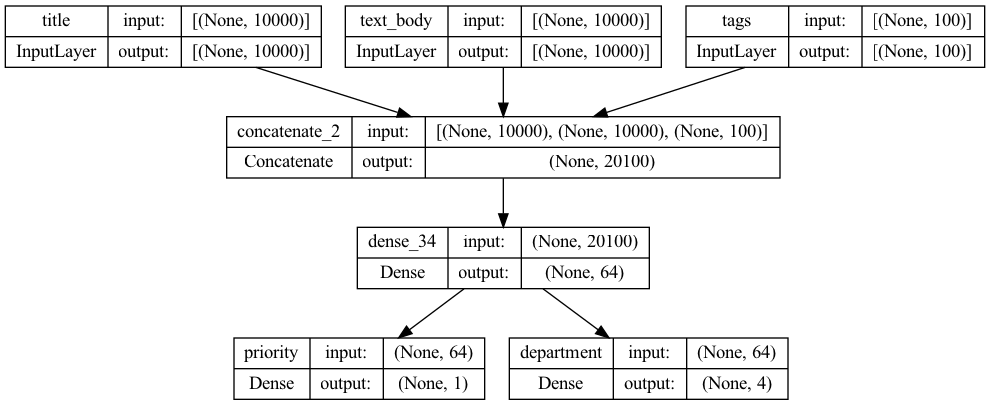

In [65]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)

**함수형 모델에서 층의 입력 또는 출력 검색**

In [66]:
model.layers

In [67]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [68]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate_2')>

**중간 층 출력을 재사용하여 새로운 모델 생성**

In [69]:
features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty])

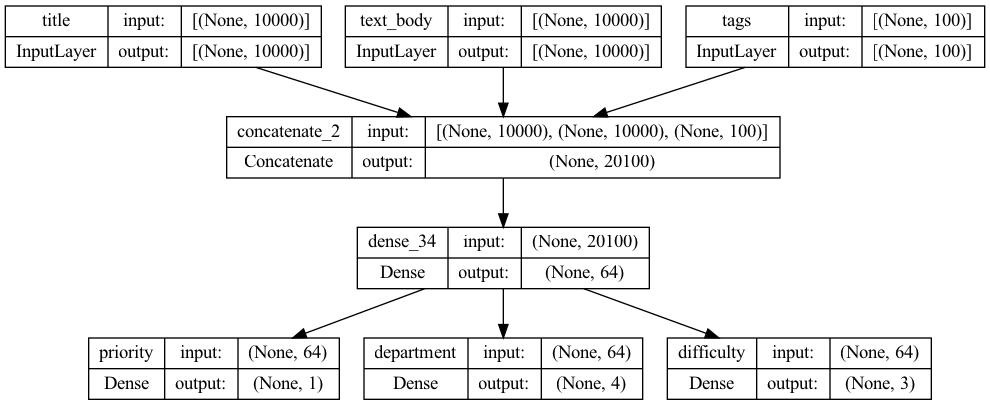

In [70]:
keras.utils.plot_model(new_model, "updated_ticket_classifier.png", show_shapes=True)

### 7.2.3 모델 클래스의 하위 클래스화 (Subclassing, 상속)

#### 이전 예제를 하위 클래스화 모델로 다시 작성

**단순 하위 클래스화 모델**

In [71]:
class CustomerTicketModel(keras.Model):

    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(
            num_departments, activation="softmax")

    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

In [72]:
model = CustomerTicketModel(num_departments=4)

# `fit` 이전에 실제 데이터를 주입하는 이유를 모르겠다 ...
# priority, department = model(
#     {"title": title_data, "text_body": text_body_data, "tags": tags_data})

priority, department = model(
    {"title": title, "text_body": text_body, "tags": tags})

In [73]:
model.summary()

Model: "customer_ticket_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 concatenate_3 (Concatenate)  multiple                 0         
                                                                 
 dense_35 (Dense)            multiple                  1286464   
                                                                 
 dense_36 (Dense)            multiple                  65        
                                                                 
 dense_37 (Dense)            multiple                  260       
                                                                 
Total params: 1,286,789
Trainable params: 1,286,789
Non-trainable params: 0
_________________________________________________________________


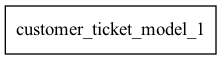

In [74]:
keras.utils.plot_model(model, "updated_ticket_classifier_subclassing.png", show_shapes=True)

In [75]:
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          [priority_data, department_data],
          epochs=1)
model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               [priority_data, department_data])
priority_preds, department_preds = model.predict({"title": title_data,
                                                  "text_body": text_body_data,
                                                  "tags": tags_data})

2022-12-10 19:22:08.026280: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/40 [=======>......................] - ETA: 0s - loss: 27.0072 - output_1_loss: 0.3234 - output_2_loss: 26.6837 - output_1_mean_absolute_error: 0.4898 - output_2_accuracy: 0.0739  

2022-12-10 19:22:08.914436: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 0s 4ms/step


2022-12-10 19:22:09.467307: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


#### 주의: 하위 클래스된 모델이 지원하지 않는 것
- 블랙박스: summary 나 층 연결 구조를 확인할 수 없다. call 메소드 소스 확인 필요

### 7.2.4 다른 구성 요소 혼합 및 일치

**하위 클래스된 모델을 포함한 함수형 모델 생성**

In [76]:
class Classifier(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)

    def call(self, inputs):
        return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

**함수형 모델을 포함하는 하위 클래스된 모델 생성**

In [77]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classifier

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()

### 7.2.5 기억: 작업에 올바른 도구를 사용하라

## 7.3 훈련 및 평가 루프 사용

**표준 작업 흐름: `compile()`, `fit()`, `evaluate()`, `predict()`**

In [78]:
from tensorflow.keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

Epoch 1/3
   1/1563 [..............................] - ETA: 8:01 - loss: 2.4035 - accuracy: 0.0938

2022-12-10 19:22:19.183574: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 0.2831 - accuracy: 0.9172

2022-12-10 19:22:29.661082: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 12s 7ms/step - loss: 0.2831 - accuracy: 0.9172 - val_loss: 0.1642 - val_accuracy: 0.9531
Epoch 2/3
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1545 - accuracy: 0.9577 - val_loss: 0.1231 - val_accuracy: 0.9651
Epoch 3/3
 98/313 [========>.....................] - ETA: 0s

2022-12-10 19:22:55.036784: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


### 7.3.1 나만의 측정 지표 작성

**`Metric` 클래스를 하위 클래스화하여 사용자 측정지표 구현**
- [`tf.keras.metrics.RootMeanSquaredError`](https://github.com/keras-team/keras/blob/v2.11.0/keras/metrics/metrics.py#L2453-L2506) 참조

In [79]:
import tensorflow as tf

class RootMeanSquaredError(keras.metrics.Metric):

    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(
            name="total_samples", initializer="zeros", dtype="int32")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

In [80]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy", RootMeanSquaredError()])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
   1/1563 [..............................] - ETA: 8:39 - loss: 2.4305 - accuracy: 0.0625 - rmse: 5.4442

2022-12-10 19:25:36.729104: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 0.2851 - accuracy: 0.9146 - rmse: 7.2011

2022-12-10 19:25:48.152256: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 13s 8ms/step - loss: 0.2851 - accuracy: 0.9146 - rmse: 7.2011 - val_loss: 0.1628 - val_accuracy: 0.9543 - val_rmse: 7.3518
Epoch 2/3
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1544 - accuracy: 0.9565 - rmse: 7.3679 - val_loss: 0.1314 - val_accuracy: 0.9656 - val_rmse: 7.4066
Epoch 3/3
313/313 [==============================] - 2s 5ms/step - loss: 0.1120 - accuracy: 0.9712 - rmse: 7.4375


In [82]:
test_metrics # 손실, 정확도, 평균제곱근오차

[0.11204256862401962, 0.9712000489234924, 7.437490463256836]

### 7.3.2 콜백 사용

#### `EarlyStopping` 및  `ModelCheckpoint` 콜백

**`fit()` 메소드에서 `callbacks` 매개변수 사용**

In [83]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True,
    )
]
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

Epoch 1/10
   1/1563 [..............................] - ETA: 8:46 - loss: 2.3560 - accuracy: 0.1875

2022-12-10 19:35:36.621244: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 0.2847 - accuracy: 0.9159

2022-12-10 19:35:48.053148: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 13s 8ms/step - loss: 0.2847 - accuracy: 0.9159 - val_loss: 0.1473 - val_accuracy: 0.9571
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1549 - accuracy: 0.9560 - val_loss: 0.1252 - val_accuracy: 0.9642
Epoch 3/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.1282 - accuracy: 0.9655 - val_loss: 0.1125 - val_accuracy: 0.9714
Epoch 4/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.1111 - accuracy: 0.9707 - val_loss: 0.1178 - val_accuracy: 0.9704
Epoch 5/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.1058 - accuracy: 0.9734 - val_loss: 0.1081 - val_accuracy: 0.9752
Epoch 6/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0970 - accuracy: 0.9767 - val_loss: 0.1136 - val_accuracy: 0.9766
Epoch 7/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0898 - accuracy: 0.9775 - val_loss: 0.1107 - val_accuracy: 0.9

In [84]:
model = keras.models.load_model("checkpoint_path.keras")

In [85]:
model

### 7.3.3 나만의 콜백 작성

**`Callback` 클래스를 하위 클래스화하여 사용자 콜백 생성**

In [86]:
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

Epoch 1/10
   1/1563 [..............................] - ETA: 8:17 - loss: 2.4454 - accuracy: 0.0312

2022-12-10 19:40:24.933566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 0.2844 - accuracy: 0.9171

2022-12-10 19:40:35.514525: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 12s 8ms/step - loss: 0.2844 - accuracy: 0.9171 - val_loss: 0.1455 - val_accuracy: 0.9584
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1548 - accuracy: 0.9563 - val_loss: 0.1214 - val_accuracy: 0.9657
Epoch 3/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.1262 - accuracy: 0.9666 - val_loss: 0.1278 - val_accuracy: 0.9689
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1137 - accuracy: 0.9707 - val_loss: 0.1147 - val_accuracy: 0.9730
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1037 - accuracy: 0.9734 - val_loss: 0.1163 - val_accuracy: 0.9747
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0954 - accuracy: 0.9761 - val_loss: 0.1236 - val_accuracy: 0.9730
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0892 - accuracy: 0.9782 - val_loss: 0.1286 - val_accuracy: 0.9

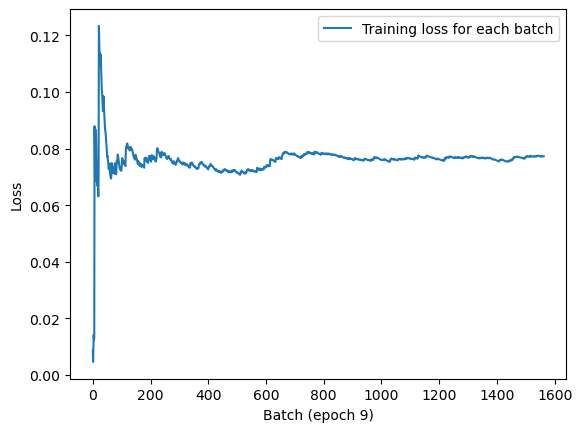

In [87]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))

### 7.3.4 텐서보드로 모니터링 및 시각화

In [88]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

tensorboard = keras.callbacks.TensorBoard(
    log_dir="./full_path_to_your_log_dir",
)
model.fit(train_images, train_labels,
          epochs=10,
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard])

Epoch 1/10


2022-12-10 19:47:50.738049: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 0.2856 - accuracy: 0.9164

2022-12-10 19:48:01.472808: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 12s 7ms/step - loss: 0.2856 - accuracy: 0.9164 - val_loss: 0.1416 - val_accuracy: 0.9583
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1541 - accuracy: 0.9560 - val_loss: 0.1390 - val_accuracy: 0.9610
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1258 - accuracy: 0.9658 - val_loss: 0.1288 - val_accuracy: 0.9671
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1136 - accuracy: 0.9697 - val_loss: 0.1045 - val_accuracy: 0.9739
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1008 - accuracy: 0.9746 - val_loss: 0.1077 - val_accuracy: 0.9759
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0940 - accuracy: 0.9767 - val_loss: 0.1171 - val_accuracy: 0.9748
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0876 - accuracy: 0.9784 - val_loss: 0.1355 - val_accuracy: 0.9

In [89]:
%load_ext tensorboard
%tensorboard --logdir ./full_path_to_your_log_dir

## 7.4 나만의 훈련 및 평가 루프 작성

### 7.4.1 훈련 vs. 추론

### 7.4.2 측정지표의 저수준 사용

In [90]:
metric = keras.metrics.SparseCategoricalAccuracy()
targets = [0, 1, 2]
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
metric.update_state(targets, predictions)
current_result = metric.result()
print(f"result: {current_result:.2f}")

result: 1.00


In [91]:
values = [0, 1, 2, 3, 4]
mean_tracker = keras.metrics.Mean()
for value in values:
    mean_tracker.update_state(value)
print(f"Mean of values: {mean_tracker.result():.2f}")

Mean of values: 2.00


### 7.4.3 완전한 훈련 및 평가 루프

**단계별 루프 작성: 훈련 단계 함수**

In [92]:
model = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.RMSprop()
metrics = [keras.metrics.SparseCategoricalAccuracy()]
loss_tracking_metric = keras.metrics.Mean()

def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["loss"] = loss_tracking_metric.result()
    return logs

**단계별 루프 작성: 매트릭스 재설정**

In [93]:
def reset_metrics():
    for metric in metrics:
        metric.reset_state()
    loss_tracking_metric.reset_state()

**단계별 루프 작성: 루프 자체**

In [94]:
training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
training_dataset = training_dataset.batch(32)
epochs = 3
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
    print(f"Results at the end of epoch {epoch}")
    for key, value in logs.items():
        print(f"...{key}: {value:.4f}")

Results at the end of epoch 0
...sparse_categorical_accuracy: 0.9197
...loss: 0.2737
Results at the end of epoch 1
...sparse_categorical_accuracy: 0.9667
...loss: 0.1215
Results at the end of epoch 2
...sparse_categorical_accuracy: 0.9804
...loss: 0.0778


**단계별 루프 작성: 평가 루프**

In [95]:
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

Evaluation results:
...val_sparse_categorical_accuracy: 0.9577
...val_loss: 0.1836


### 7.4.4 tf.function 으로 속도 향상

**평가-단계 함수에 `tf.function` 데코레이터(decorator) 추가**

In [96]:
@tf.function
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

2022-12-10 20:45:35.284398: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Evaluation results:
...val_sparse_categorical_accuracy: 0.9577
...val_loss: 0.1836


2022-12-10 20:45:36.096467: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


### 7.4.5 사용자 훈련 루프로 fit() 향상

**`fit()`를 사용하여 사용자 훈련 단계 구현**

In [97]:
loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean(name="loss")

class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = loss_fn(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))

        loss_tracker.update_state(loss)
        return {"loss": loss_tracker.result()}

    @property
    def metrics(self):
        return [loss_tracker]

In [98]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop())
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
   1/1563 [..............................] - ETA: 11:04 - loss: 2.4525

2022-12-10 20:46:06.059523: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 9s 6ms/step - loss: 0.2864
Epoch 2/3
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1548
Epoch 3/3
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1272


In [99]:
class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = self.compiled_loss(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))
        self.compiled_metrics.update_state(targets, predictions)
        return {m.name: m.result() for m in self.metrics}

In [100]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3


2022-12-10 20:46:51.515387: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 11s 7ms/step - loss: 0.2814 - sparse_categorical_accuracy: 0.9179
Epoch 2/3
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1536 - sparse_categorical_accuracy: 0.9572
Epoch 3/3
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1279 - sparse_categorical_accuracy: 0.9656


## 7.5 요약